# Gradient Descent

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## Linear Algebra with Numpy

In [3]:
a = np.array([1, 3, 2, 4])

In [4]:
a

array([1, 3, 2, 4])

In [5]:
type(a)

numpy.ndarray

In [6]:
A = np.array([[3, 1, 2],
              [2, 3, 4]])

B = np.array([[0, 1],
              [2, 3],
              [4, 5]])

C = np.array([[0, 1],
              [2, 3],
              [4, 5],
              [0, 1],
              [2, 3],
              [4, 5]])

print("A is a {} matrix".format(A.shape))
print("B is a {} matrix".format(B.shape))
print("C is a {} matrix".format(C.shape))

A is a (2, 3) matrix
B is a (3, 2) matrix
C is a (6, 2) matrix


In [7]:
A[0]

array([3, 1, 2])

In [8]:
C[2, 0]

4

In [9]:
B[:, 0]

array([0, 2, 4])

### Elementwise operations

In [10]:
3 * A

array([[ 9,  3,  6],
       [ 6,  9, 12]])

In [11]:
A + A

array([[6, 2, 4],
       [4, 6, 8]])

In [12]:
A * A

array([[ 9,  1,  4],
       [ 4,  9, 16]])

In [13]:
A / A

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [14]:
A - A

array([[0, 0, 0],
       [0, 0, 0]])

In [15]:
A + B

ValueError: operands could not be broadcast together with shapes (2,3) (3,2) 

In [16]:
A * B

ValueError: operands could not be broadcast together with shapes (2,3) (3,2) 

### Dot product

In [17]:
A.shape

(2, 3)

In [18]:
B.shape

(3, 2)

In [19]:
A.dot(B)

array([[10, 16],
       [22, 31]])

In [20]:
np.dot(A, B)

array([[10, 16],
       [22, 31]])

In [21]:
B.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

In [22]:
C.shape

(6, 2)

In [23]:
A.shape

(2, 3)

In [24]:
C.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28],
       [ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

In [25]:
A.dot(C)

ValueError: shapes (2,3) and (6,2) not aligned: 3 (dim 1) != 6 (dim 0)

## Gradient descent

![](../data/banknotes.png)

In [26]:
df = pd.read_csv('../data/banknotes.csv')

In [27]:
df.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [28]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [29]:
import seaborn as sns

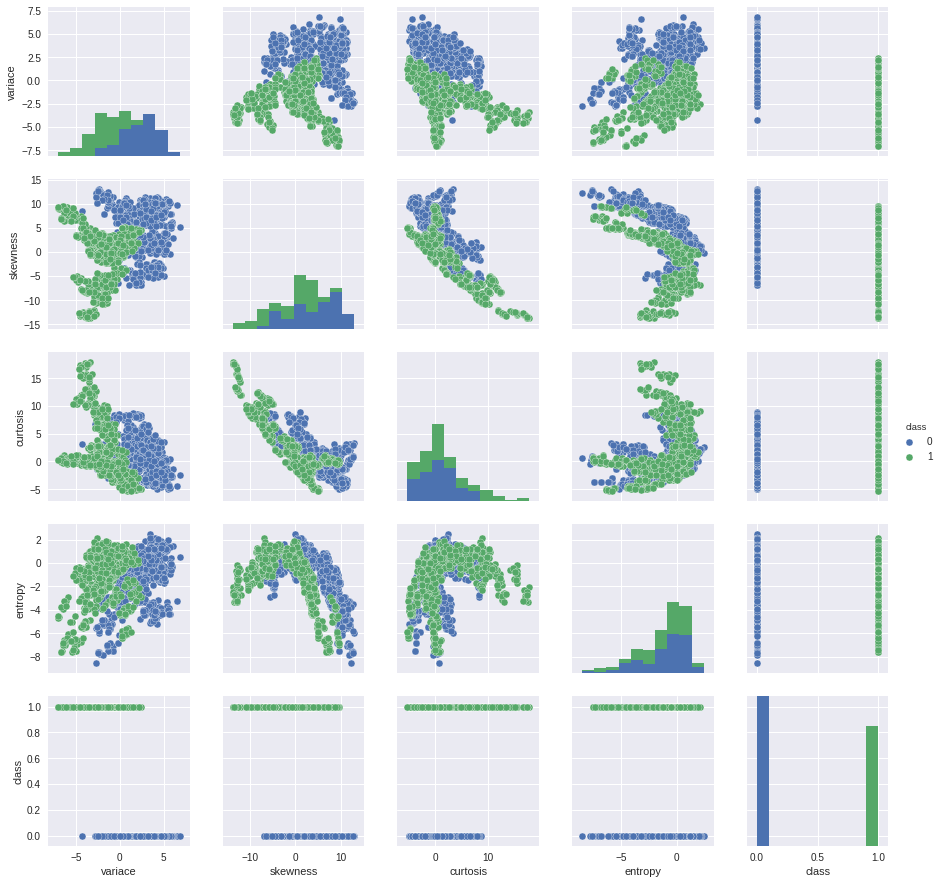

In [30]:
sns.pairplot(df, hue="class")

#### Baseline model

In [31]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [32]:
X = scale(df.drop('class', axis=1).values)
y = df['class'].values

In [33]:
model = RandomForestClassifier()
cross_val_score(model, X, y)

array([ 0.99126638,  0.98905908,  0.99781182])

### Logistic Regression Model

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [35]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [36]:
K.clear_session()

model = Sequential()
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, y_train)
result = model.evaluate(X_test, y_test)

Epoch 1/10
960/960 [==============================] - 0s - loss: 0.3698 - acc: 0.9250     
Epoch 2/10
960/960 [==============================] - 0s - loss: 0.3588 - acc: 0.9240     
Epoch 3/10
960/960 [==============================] - 0s - loss: 0.3491 - acc: 0.9240     
Epoch 4/10
960/960 [==============================] - 0s - loss: 0.3404 - acc: 0.9281     
Epoch 5/10
960/960 [==============================] - 0s - loss: 0.3324 - acc: 0.9312     
Epoch 6/10
960/960 [==============================] - 0s - loss: 0.3251 - acc: 0.9333     
Epoch 7/10
960/960 [==============================] - 0s - loss: 0.3184 - acc: 0.9344     
Epoch 8/10
960/960 [==============================] - 0s - loss: 0.3121 - acc: 0.9365     
Epoch 9/10
960/960 [==============================] - 0s - loss: 0.3063 - acc: 0.9344     
Epoch 10/10
 32/412 [=>............................] - ETA: 0s

In [37]:
historydf = pd.DataFrame(history.history, index=history.epoch)

In [38]:
historydf.head()

,acc,loss
0,0.925000,0.369788
1,0.923958,0.358812
2,0.923958,0.349082
3,0.928125,0.340356
4,0.931250,0.332395


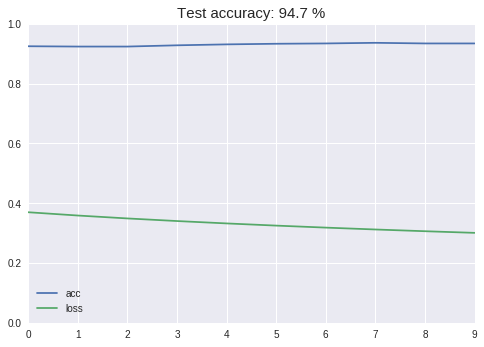

In [39]:
historydf.plot(ylim=(0,1))
plt.title("Test accuracy: {:3.1f} %".format(result[1]*100), fontsize=15)

### Learning Rates

In [40]:
dflist = []

learning_rates = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(lr=lr),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [42]:
historydf = pd.concat(dflist, axis=1)

In [43]:
historydf

,acc,loss,acc,loss,acc,loss,acc,loss
0,0.851042,0.459956,0.591667,0.673997,0.856250,0.414106,0.860417,0.338127
1,0.855208,0.430720,0.755208,0.480467,0.955208,0.249354,0.962500,0.138952
2,0.861458,0.407358,0.820833,0.393576,0.958333,0.199900,0.972917,0.099547
3,0.863542,0.388014,0.863542,0.335236,0.963542,0.171156,0.975000,0.082847
4,0.870833,0.371393,0.898958,0.292379,0.965625,0.151685,0.977083,0.073055
5,0.884375,0.356781,0.922917,0.259350,0.968750,0.137297,0.978125,0.066592
6,0.891667,0.343756,0.932292,0.233541,0.968750,0.126153,0.980208,0.061715
7,0.895833,0.331982,0.940625,0.212748,0.969792,0.117410,0.980208,0.058343
8,0.901042,0.321252,0.948958,0.195866,0.970833,0.110208,0.981250,0.055369
9,0.905208,0.311373,0.958333,0.181875,0.970833,0.104257,0.981250,0.053087


In [44]:
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported],
                                 names=['learning_rate', 'metric'])

historydf.columns = idx

In [45]:
historydf

learning_rate      0.01                0.05                0.10            \
metric              acc      loss       acc      loss       acc      loss   
0              0.851042  0.459956  0.591667  0.673997  0.856250  0.414106   
1              0.855208  0.430720  0.755208  0.480467  0.955208  0.249354   
2              0.861458  0.407358  0.820833  0.393576  0.958333  0.199900   
3              0.863542  0.388014  0.863542  0.335236  0.963542  0.171156   
4              0.870833  0.371393  0.898958  0.292379  0.965625  0.151685   
5              0.884375  0.356781  0.922917  0.259350  0.968750  0.137297   
6              0.891667  0.343756  0.932292  0.233541  0.968750  0.126153   
7              0.895833  0.331982  0.940625  0.212748  0.969792  0.117410   
8              0.901042  0.321252  0.948958  0.195866  0.970833  0.110208   
9              0.905208  0.311373  0.958333  0.181875  0.970833  0.104257   

learning_rate      0.50            
metric              acc      loss  
0              0.860417  0.338127  
1              0.962500  0.138952  
2              0.972917  0.099547  
3              0.975000  0.082847  
4              0.977083  0.073055  
5              0.978125  0.066592  
6              0.980208  0.061715  
7              0.980208  0.058343  
8              0.981250  0.055369  
9              0.981250  0.053087

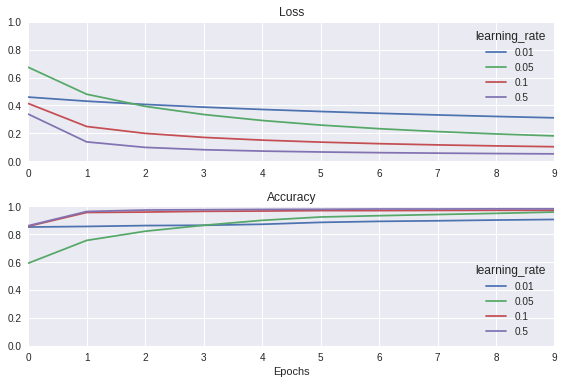

In [46]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

### Batch Sizes

In [ ]:
dflist = []

batch_sizes = [16, 32, 64, 128]

for batch_size in batch_sizes:
    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=batch_size, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [ ]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([batch_sizes, metrics_reported],
                                 names=['batch_size', 'metric'])
historydf.columns = idx

In [ ]:
historydf

In [ ]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Optimizers

In [ ]:
from keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [ ]:
dflist = []

optimizers = ['SGD(lr=0.01)',
              'SGD(lr=0.01, momentum=0.3)',
              'SGD(lr=0.01, momentum=0.3, nesterov=True)',  
              'Adam(lr=0.01)',
              'Adagrad(lr=0.01)',
              'RMSprop(lr=0.01)']

for opt_name in optimizers:

    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [ ]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, metrics_reported],
                                 names=['optimizers', 'metric'])
historydf.columns = idx

In [ ]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Initialization

https://keras.io/initializers/

In [ ]:
dflist = []

initializers = ['zeros', 'uniform', 'normal',
                'he_normal', 'lecun_uniform']

for init in initializers:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,),
                    kernel_initializer=init,
                    activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [ ]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([initializers, metrics_reported],
                                 names=['initializers', 'metric'])

historydf.columns = idx

In [ ]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Inner layer representation

In [ ]:
K.clear_session()

model = Sequential()
model.add(Dense(2, input_shape=(4,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

h = model.fit(X_train, y_train, batch_size=16, epochs=20,
              verbose=1, validation_split=0.3)
result = model.evaluate(X_test, y_test)

In [ ]:
result

In [ ]:
model.summary()

In [ ]:
model.layers

In [ ]:
inp = model.layers[0].input
out = model.layers[0].output

In [ ]:
inp

In [ ]:
out

In [ ]:
features_function = K.function([inp], [out])

In [ ]:
features_function

In [ ]:
features_function([X_test])[0].shape

In [ ]:
features = features_function([X_test])[0]

In [ ]:
plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')

In [ ]:
K.clear_session()

model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

In [ ]:
inp = model.layers[0].input
out = model.layers[1].output
features_function = K.function([inp], [out])

plt.figure(figsize=(15,10))

for i in range(1, 26):
    plt.subplot(5, 5, i)
    h = model.fit(X_train, y_train, batch_size=16, epochs=1, verbose=0)
    test_accuracy = model.evaluate(X_test, y_test)[1]
    features = features_function([X_test])[0]
    plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')
    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 4.0)
    plt.title('Epoch: {}, Test Acc: {:3.1f} %'.format(i, test_accuracy * 100.0))

plt.tight_layout()

### Exercise 1

You've just been hired at a wine company and they would like you to help them build a model that predicts the quality of their wine based on several measurements. They give you a dataset with wine

- Load the ../data/wines.csv into Pandas
- Use the column called "Class" as target
- Check how many classes are there in target, and if necessary use dummy columns for a multi-class classification
- Use all the other columns as features, check their range and distribution (using seaborn pairplot)
- Rescale all the features using either MinMaxScaler or StandardScaler
- Build a deep model with at least 1 hidden layer to classify the data
- Choose the cost function, what will you use? Mean Squared Error? Binary Cross-Entropy? Categorical Cross-Entropy?
- Choose an optimizer
- Choose a value for the learning rate, you may want to try with several values
- Choose a batch size
- Train your model on all the data using a `validation_split=0.2`. Can you converge to 100% validation accuracy?
- What's the minumum number of epochs to converge?
- Repeat the training several times to verify how stable your results are

### Exercise 2

Since this dataset has 13 features we can only visualize pairs of features like we did in the Paired plot. We could however exploit the fact that a neural network is a function to extract 2 high level features to represent our data.

- Build a deep fully connected network with the following structure:
    - Layer 1: 8 nodes
    - Layer 2: 5 nodes
    - Layer 3: 2 nodes
    - Output : 3 nodes
- Choose activation functions, inizializations, optimizer and learning rate so that it converges to 100% accuracy within 20 epochs (not easy)
- Remember to train the model on the scaled data
- Define a Feature Funtion like we did above between the input of the 1st layer and the output of the 3rd layer
- Calculate the features and plot them on a 2-dimensional scatter plot
- Can we distinguish the 3 classes well?


### Exercise 3

Keras functional API. So far we've always used the Sequential model API in Keras. However, Keras also offers a Functional API, which is much more powerful. You can find its [documentation here](https://keras.io/getting-started/functional-api-guide/). Let's see how we can leverage it.

- define an input layer called `inputs`
- define two hidden layers as before, one with 8 nodes, one with 5 nodes
- define a `second_to_last` layer with 2 nodes
- define an output layer with 3 nodes
- create a model that connect input and output
- train it and make sure that it converges
- define a function between inputs and second_to_last layer
- recalculate the features and plot them

### Exercise 4 

Keras offers the possibility to call a function at each epoch. These are Callbacks, and their [documentation is here](https://keras.io/callbacks/). Callbacks allow us to add some neat functionality. In this exercise we'll explore a few of them.

- Split the data into train and test sets with a test_size = 0.3 and random_state=42
- Reset and recompile your model
- train the model on the train data using `validation_data=(X_test, y_test)`
- Use the `EarlyStopping` callback to stop your training if the `val_loss` doesn't improve
- Use the `ModelCheckpoint` callback to save the trained model to disk once training is finished
- Use the `TensorBoard` callback to output your training information to a `/tmp/` subdirectory
- Watch the next video for an overview of tensorboard